# Add 30% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## Age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')

--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 30)

Outliers found:


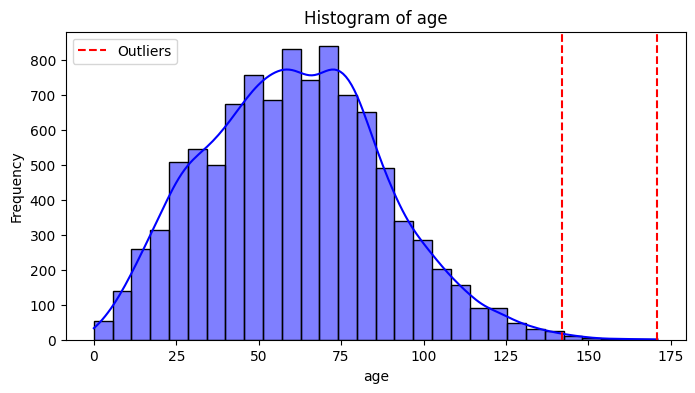

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      1541
           1       0.78      0.95      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.86      0.85      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Node Labels:
 Annotation(0.585295, 0.954545, 'avg_glucose_level <= 171.09\nsamples = 6988\nvalue = [3438, 3550]\nclass = 1')


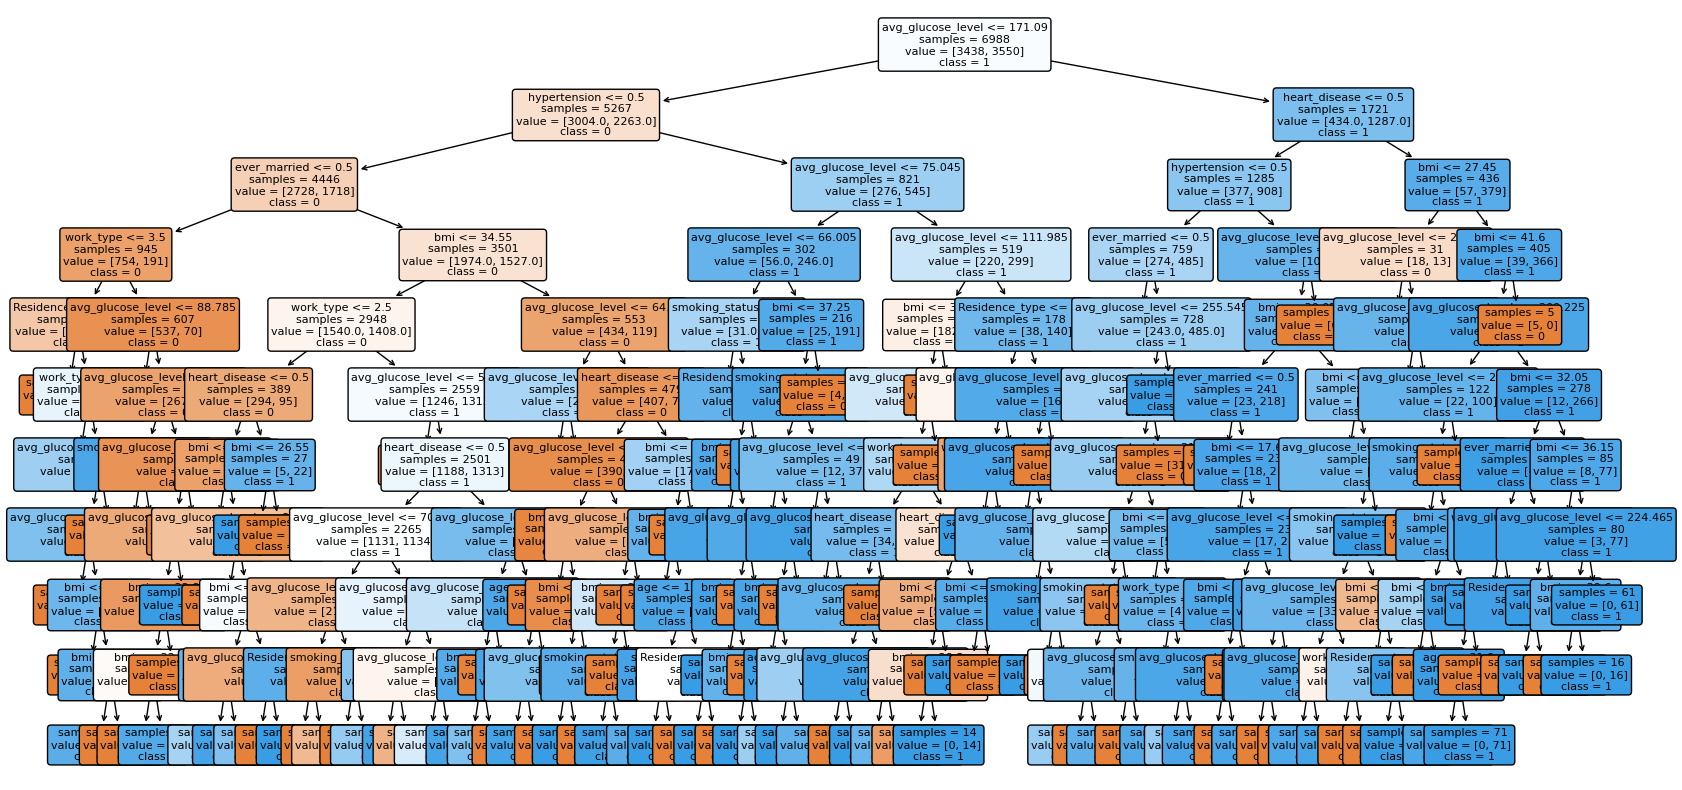

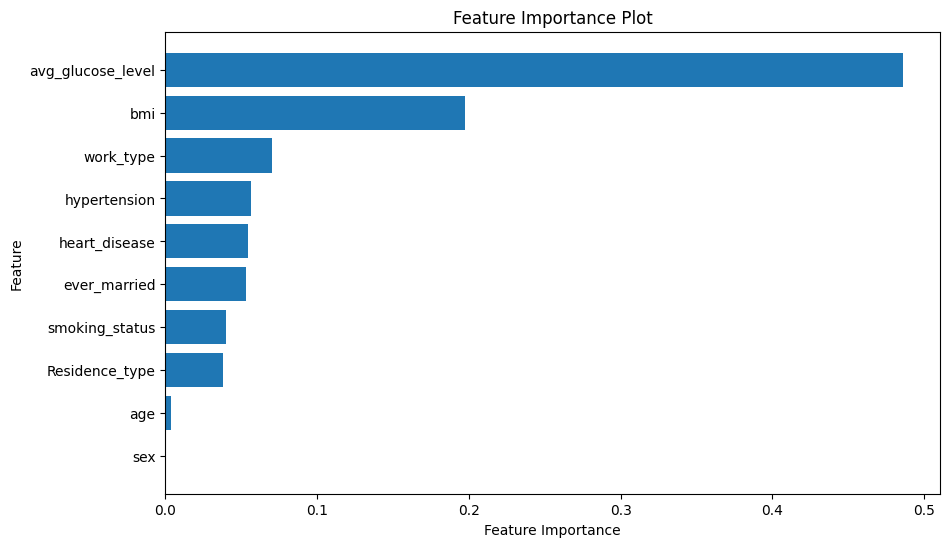

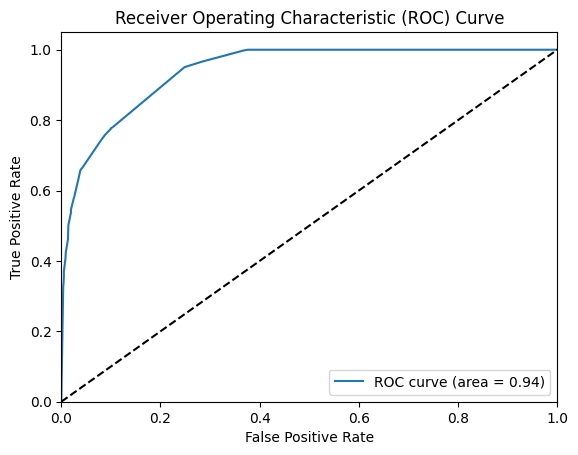

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9399486208580584
Accuracy for each fold: [0.7866666666666666, 0.7966666666666666, 0.7866666666666666, 0.78, 0.8233333333333334, 0.79, 0.822742474916388, 0.8160535117056856, 0.8060200668896321, 0.782608695652174]
Mean accuracy: 0.7990758082497212
95% confidence interval: (0.7871146170255154, 0.811036999473927)


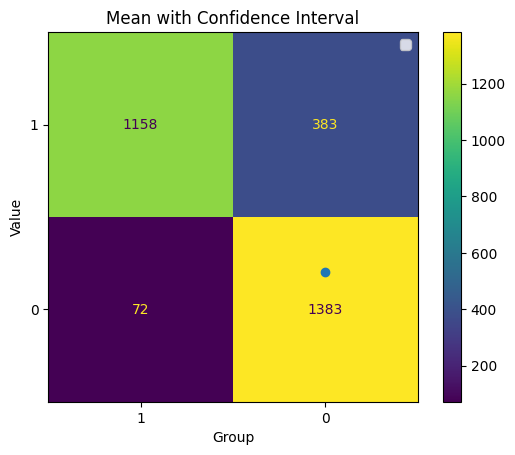

In [6]:
decision_tree = ML_algorithms.model_dt(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1541
           1       0.70      0.60      0.65      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.68      0.68      2996



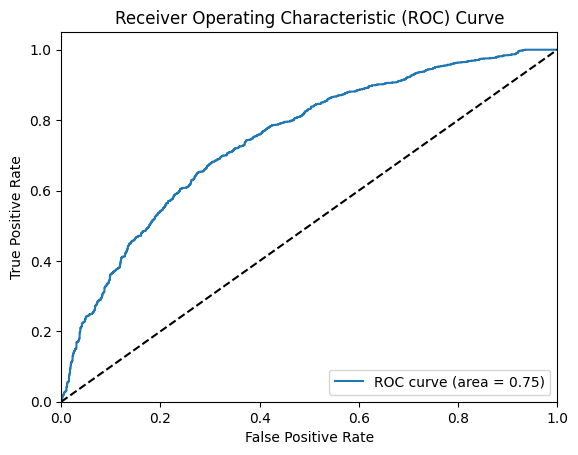

AUC Score: 0.7468216960914834


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.61, 0.6566666666666666, 0.69, 0.6566666666666666, 0.7266666666666667, 0.71, 0.7090301003344481, 0.6588628762541806, 0.6153846153846154, 0.6220735785953178]
Mean accuracy: 0.6655351170568562
95% confidence interval: (0.6354726444233436, 0.6955975896903688)


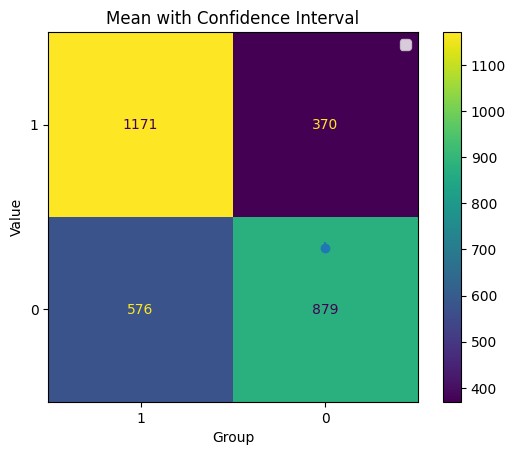

In [7]:
svm = ML_algorithms.model_svm(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_age, 'age')

Outliers found:


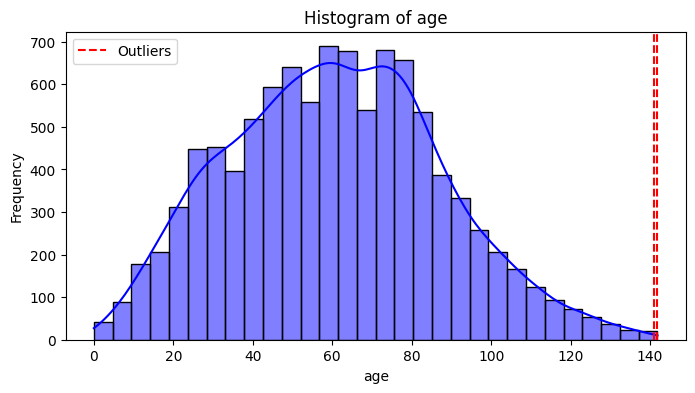

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      1541
           1       0.78      0.95      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.86      0.85      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Node Labels:
 Annotation(0.584159, 0.954545, 'avg_glucose_level <= 171.09\nsamples = 6988\nvalue = [3438, 3550]\nclass = 1')


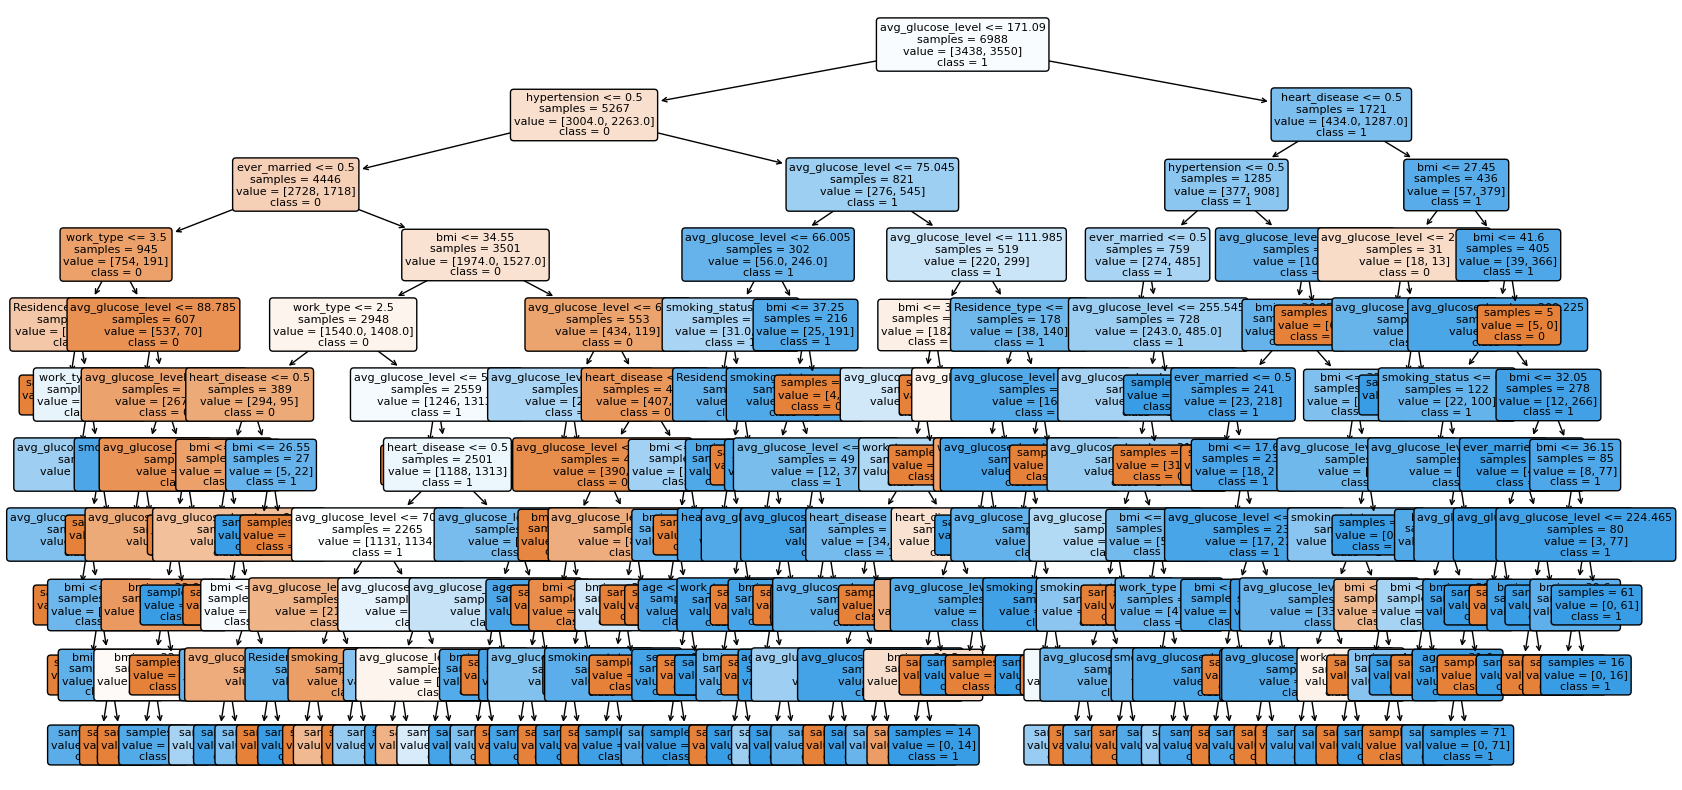

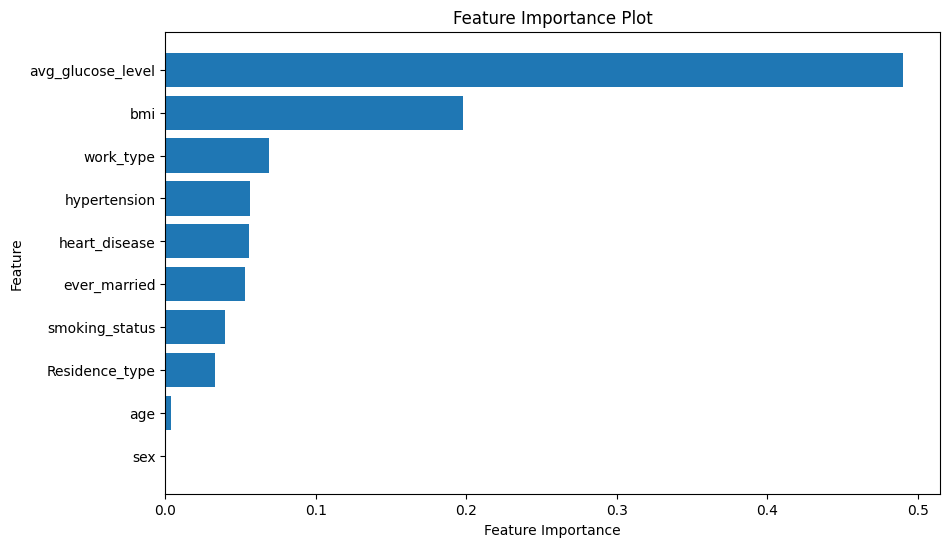

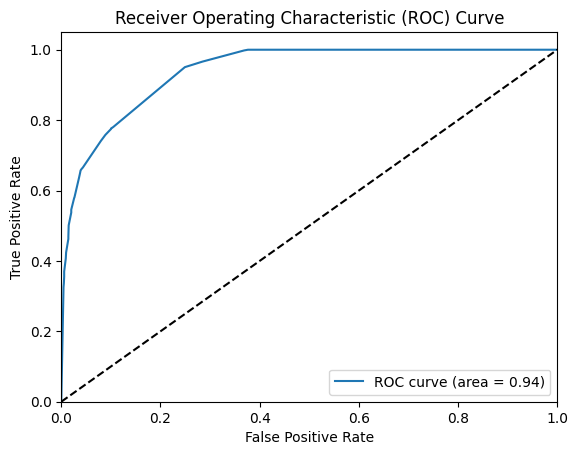

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9394053934719054
Accuracy for each fold: [0.8233333333333334, 0.79, 0.8233333333333334, 0.8133333333333334, 0.8166666666666667, 0.8733333333333333, 0.7959866220735786, 0.7892976588628763, 0.7859531772575251, 0.7558528428093646]
Mean accuracy: 0.8067090301003346
95% confidence interval: (0.7842779760451797, 0.8291400841554895)


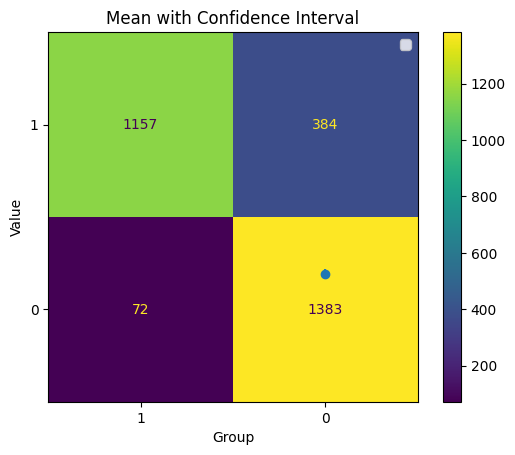

In [10]:
decision_tree = ML_algorithms.model_dt(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1541
           1       0.70      0.60      0.65      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.68      0.68      2996



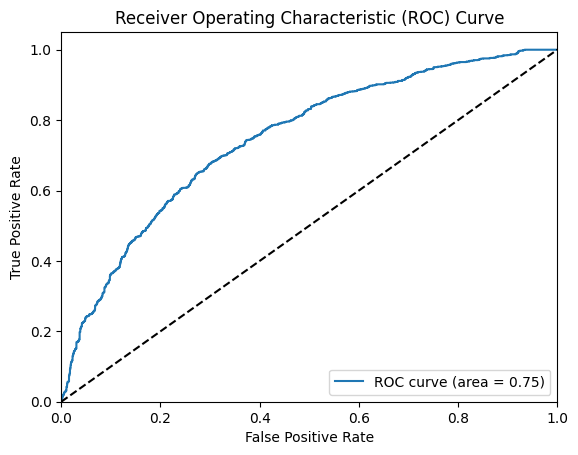

AUC Score: 0.746966199928194


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7366666666666667, 0.6966666666666667, 0.69, 0.71, 0.6366666666666667, 0.6366666666666667, 0.6153846153846154, 0.6488294314381271, 0.6488294314381271, 0.6387959866220736]
Mean accuracy: 0.6658506131549611
95% confidence interval: (0.6375776501055386, 0.6941235762043836)


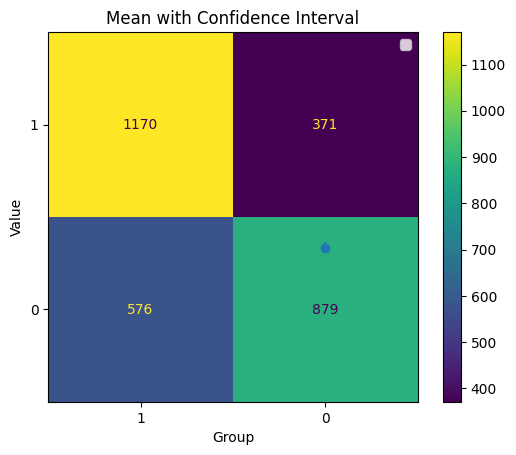

--------------------------------------


In [11]:
svm = ML_algorithms.model_svm(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_original.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 30)

Outliers found:


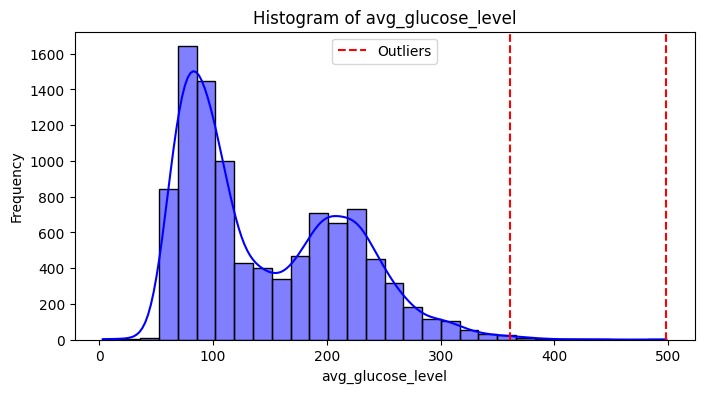

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1541
           1       0.80      0.80      0.80      1455

    accuracy                           0.81      2996
   macro avg       0.81      0.81      0.81      2996
weighted avg       0.81      0.81      0.81      2996

Node Labels:
 Annotation(0.630346, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3475, 3513]\nclass = 1')


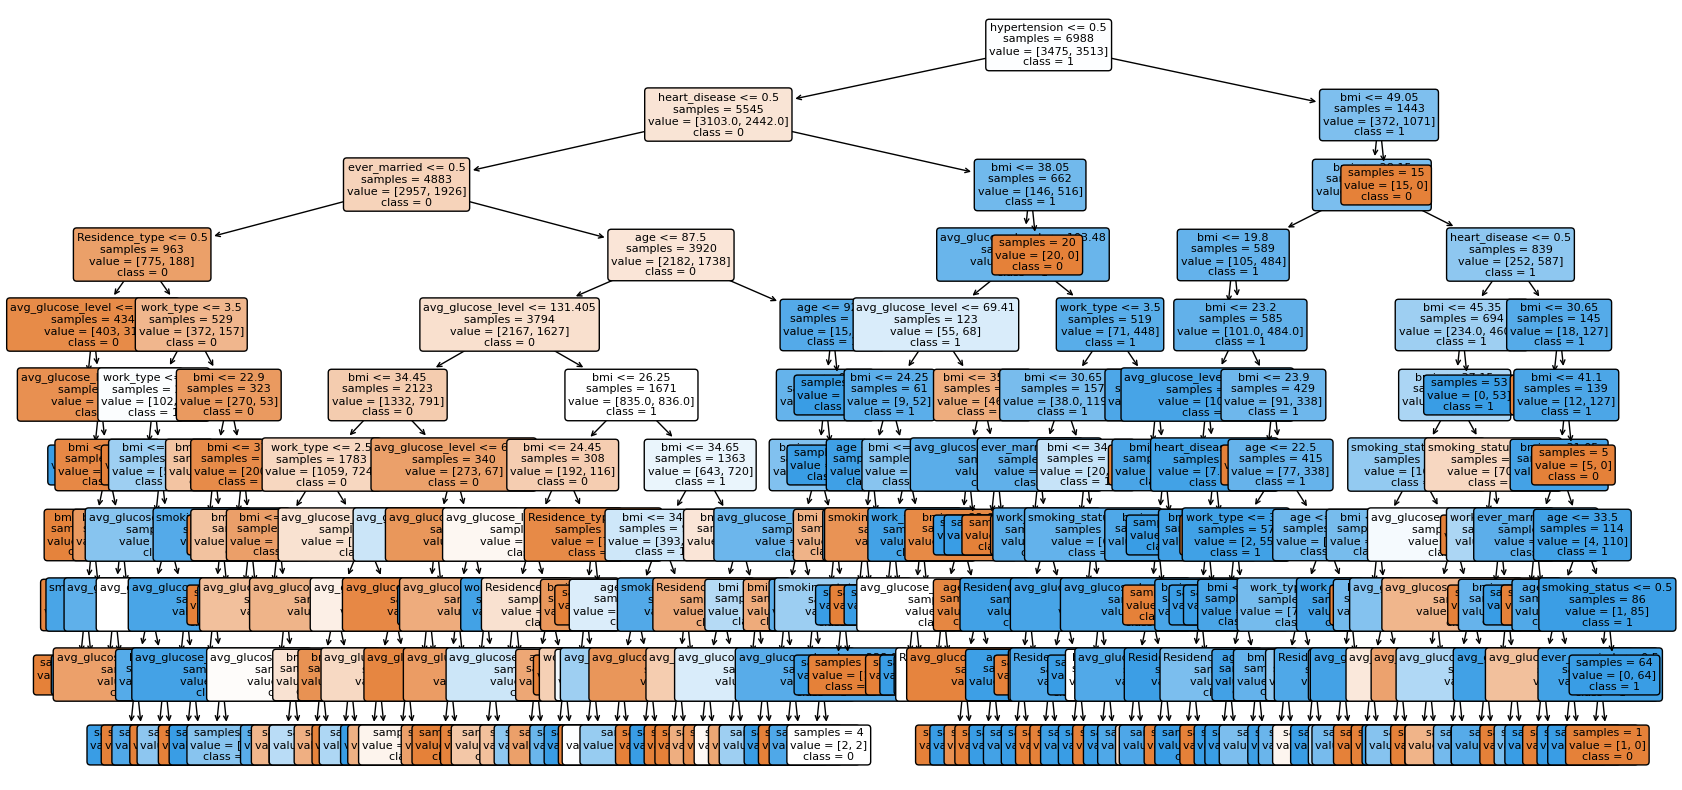

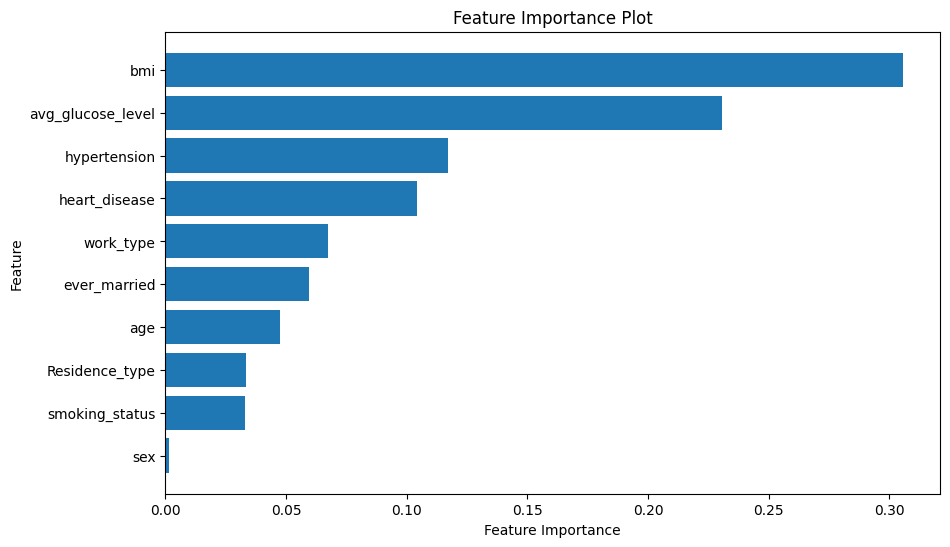

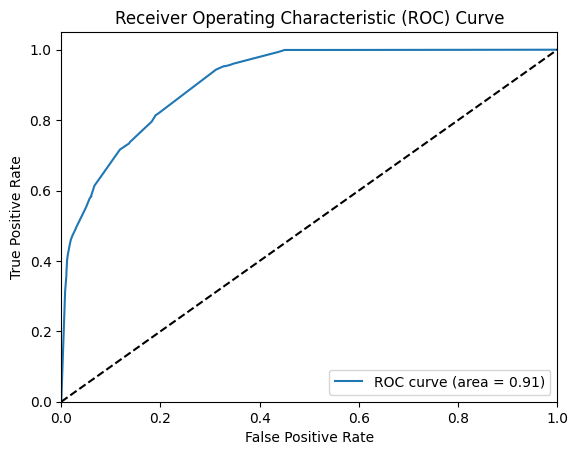

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.911079296480395
Accuracy for each fold: [0.7933333333333333, 0.7966666666666666, 0.7733333333333333, 0.8066666666666666, 0.8, 0.81, 0.7926421404682275, 0.802675585284281, 0.8394648829431438, 0.8327759197324415]
Mean accuracy: 0.8047558528428095
95% confidence interval: (0.7908969433002943, 0.8186147623853247)


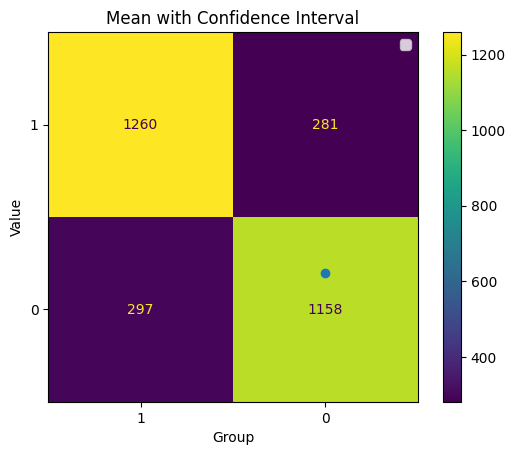

In [16]:
decision_tree = ML_algorithms.model_dt(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



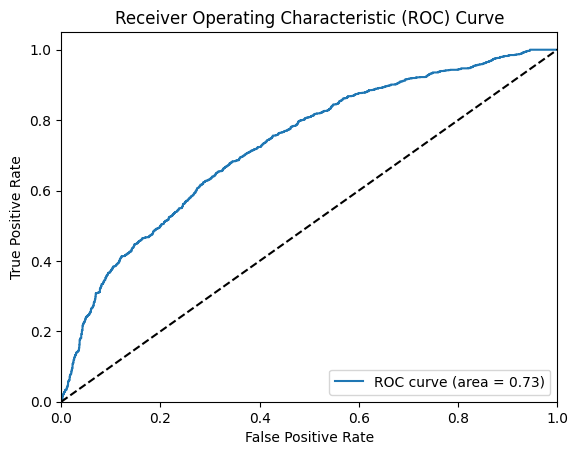

AUC Score: 0.7296409035057789


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6633333333333333, 0.69, 0.6733333333333333, 0.6733333333333333, 0.6733333333333333, 0.66, 0.6287625418060201, 0.6321070234113713, 0.6488294314381271, 0.68561872909699]
Mean accuracy: 0.6628651059085842
95% confidence interval: (0.6479790079644892, 0.6777512038526792)


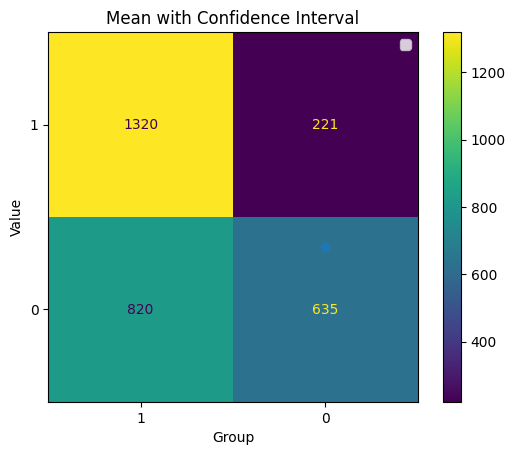

In [17]:
svm = ML_algorithms.model_svm(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_glucose, 'avg_glucose_level')

Outliers found:


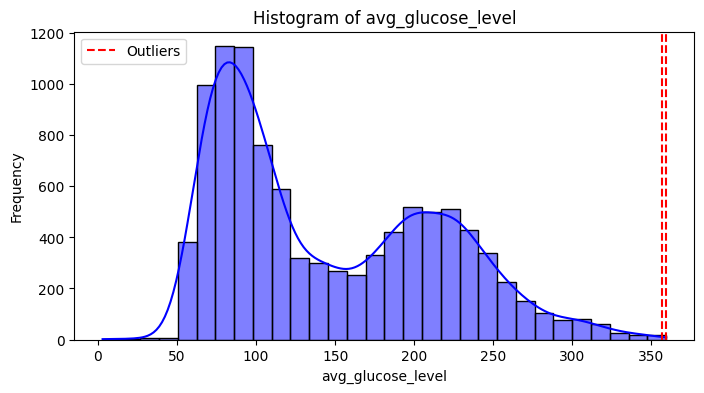

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1541
           1       0.80      0.80      0.80      1455

    accuracy                           0.81      2996
   macro avg       0.81      0.81      0.81      2996
weighted avg       0.81      0.81      0.81      2996

Node Labels:
 Annotation(0.635934, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3475, 3513]\nclass = 1')


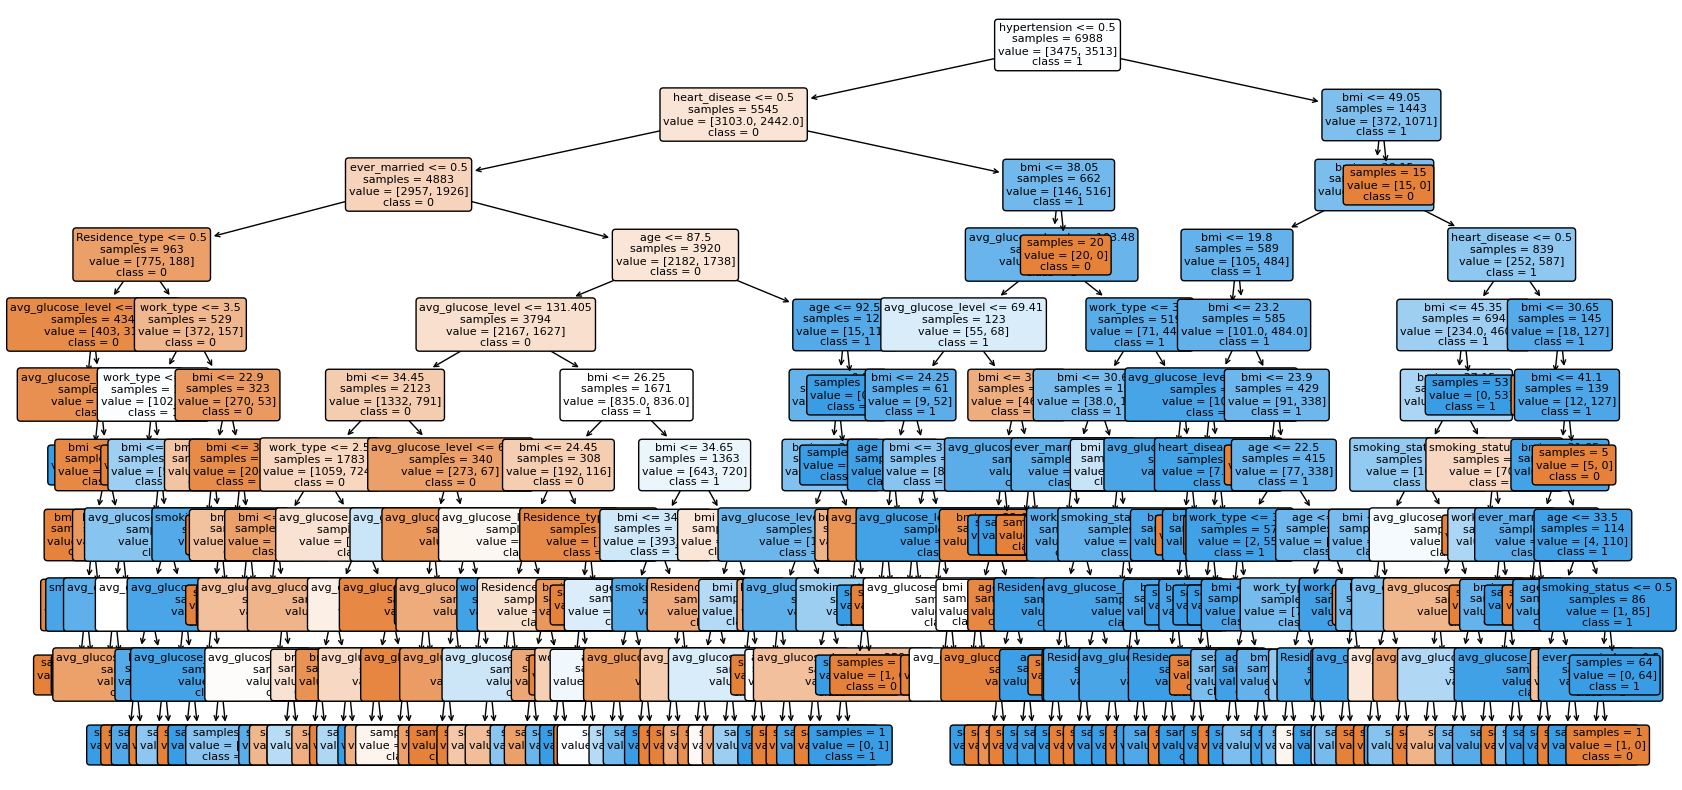

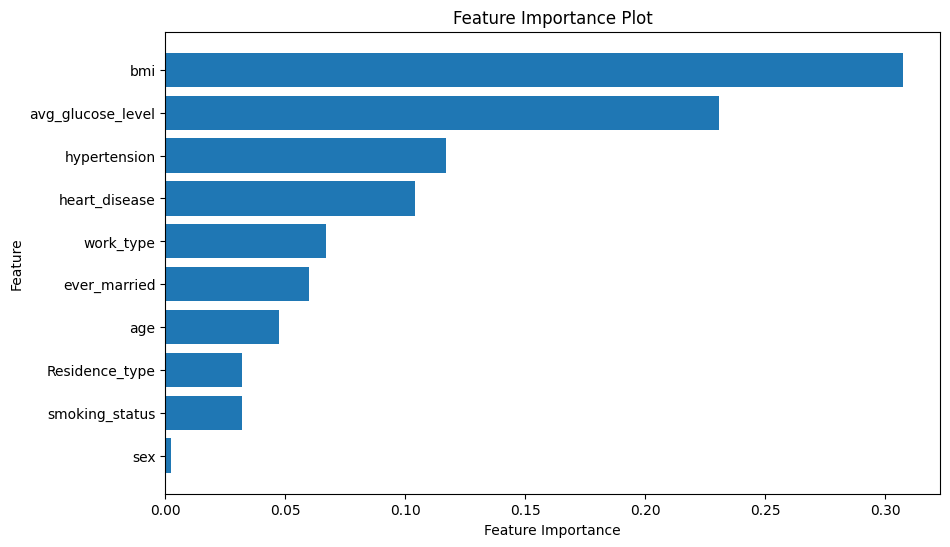

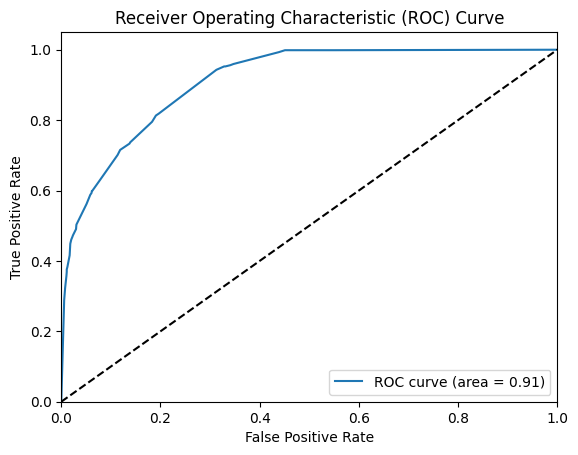

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9103478573069212
Accuracy for each fold: [0.8433333333333334, 0.7833333333333333, 0.7966666666666666, 0.8133333333333334, 0.81, 0.83, 0.8260869565217391, 0.8060200668896321, 0.8193979933110368, 0.8294314381270903]
Mean accuracy: 0.8157603121516164
95% confidence interval: (0.8030979958956961, 0.8284226284075367)


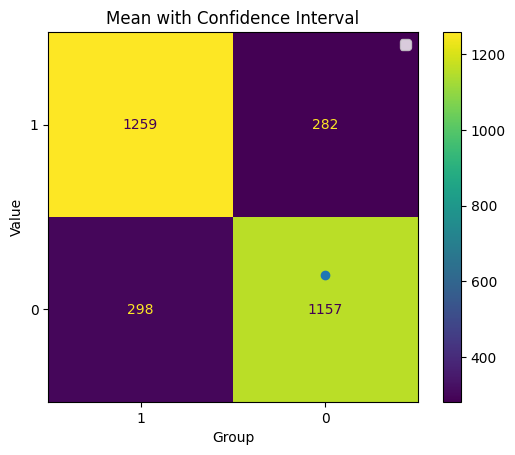

In [20]:
decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



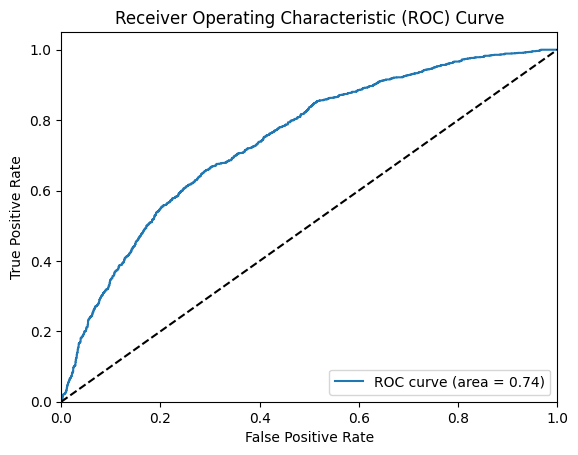

AUC Score: 0.7428331225985715


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6866666666666666, 0.6933333333333334, 0.6266666666666667, 0.6033333333333334, 0.6833333333333333, 0.69, 0.6822742474916388, 0.6655518394648829, 0.7023411371237458, 0.6555183946488294]
Mean accuracy: 0.668901895206243
95% confidence interval: (0.6461097051077194, 0.6916940853047666)


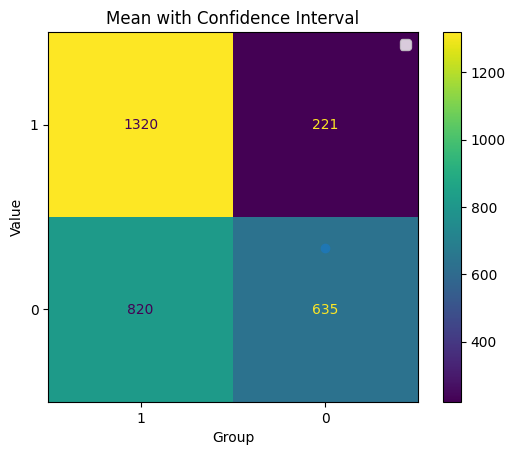

--------------------------------------


In [21]:
svm = ML_algorithms.model_svm(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## bmi

In [22]:
df = df_original.copy()

--------------------------------------
Outliers found:


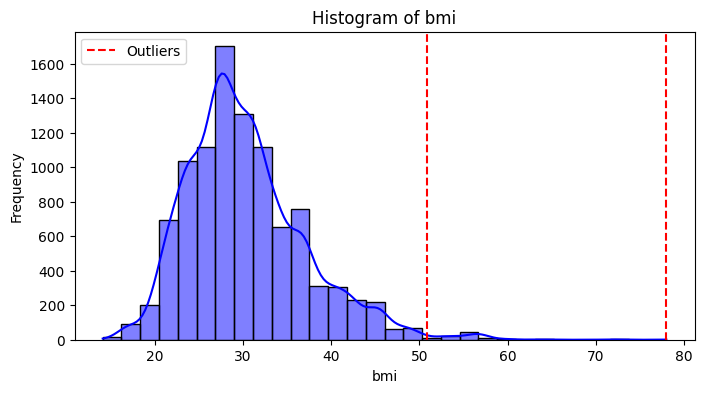

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 30)

Outliers found:


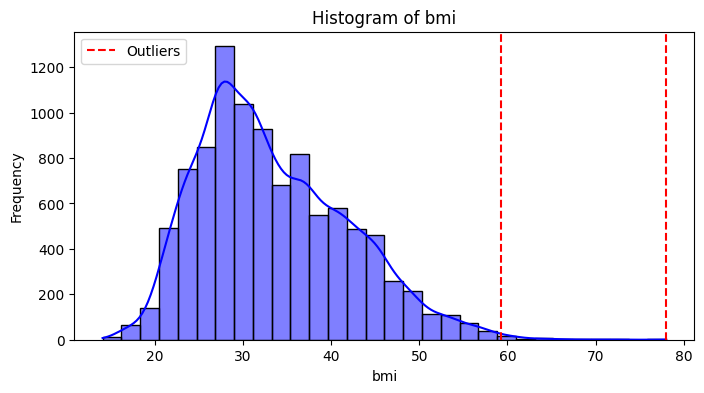

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1541
           1       0.83      0.88      0.85      1455

    accuracy                           0.85      2996
   macro avg       0.85      0.85      0.85      2996
weighted avg       0.85      0.85      0.85      2996

Node Labels:
 Annotation(0.599349, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6988\nvalue = [3500.0, 3488.0]\nclass = 0')


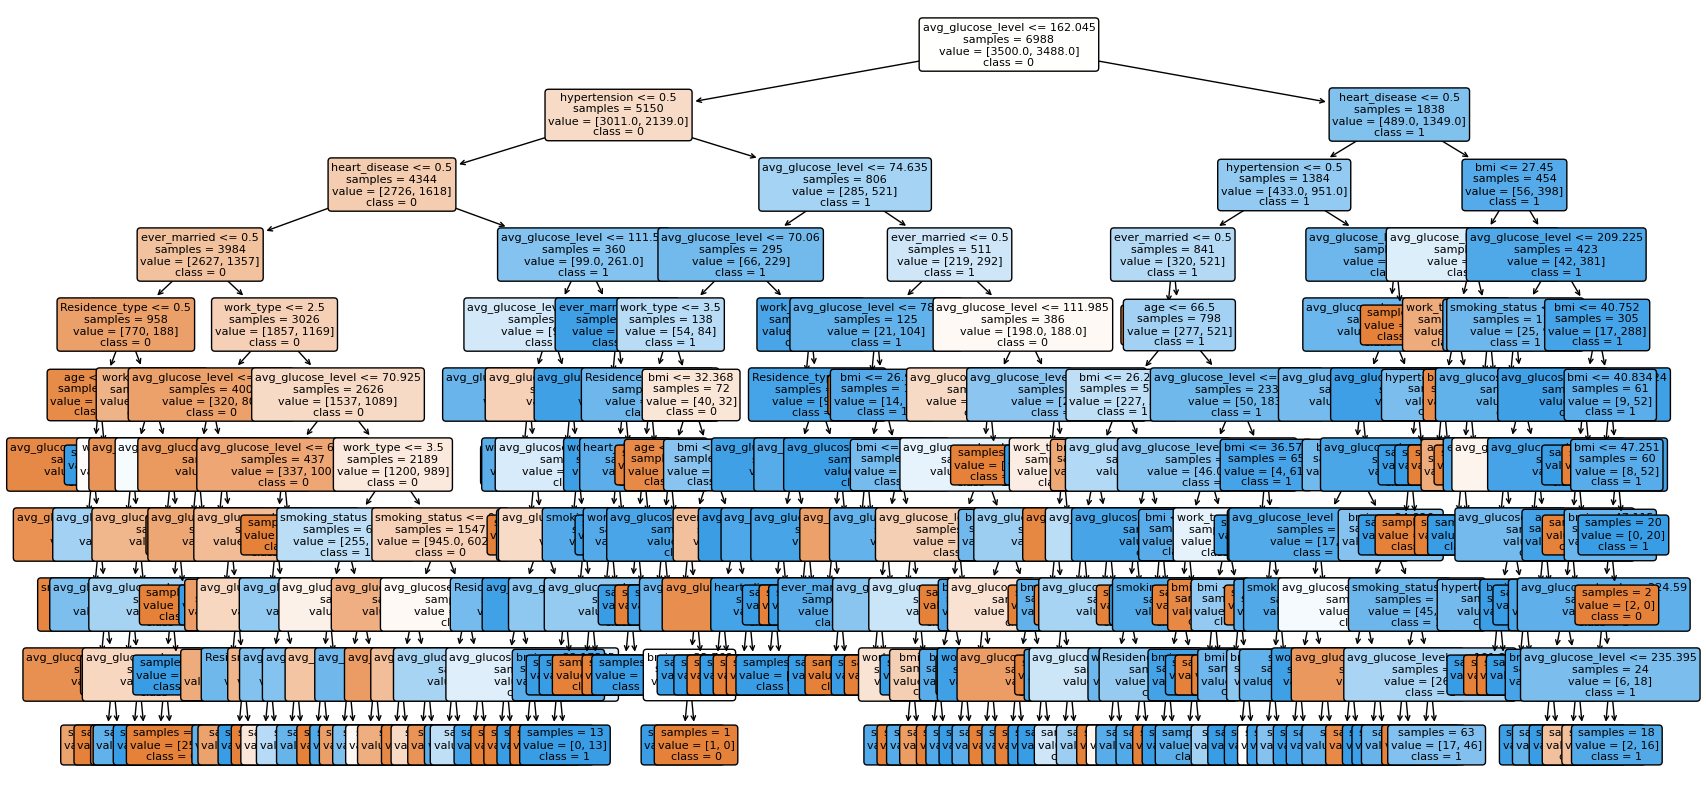

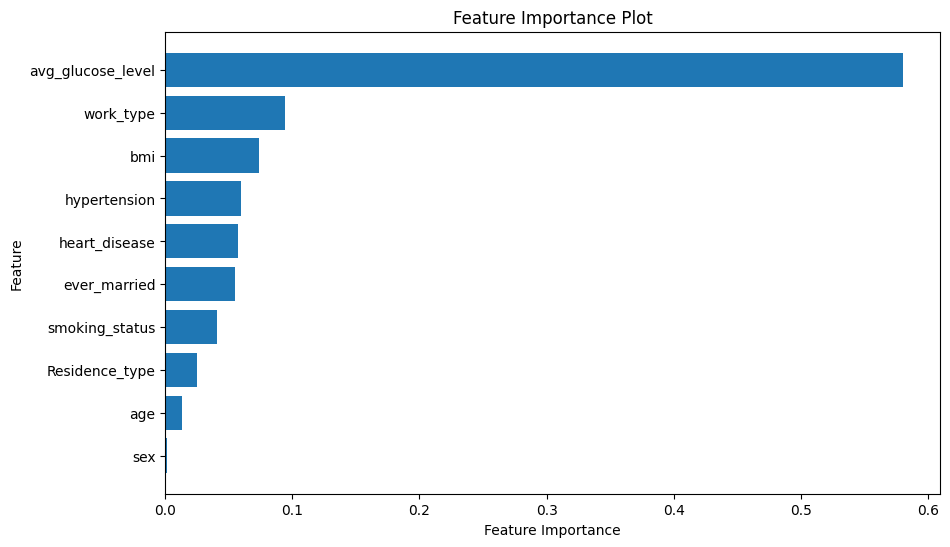

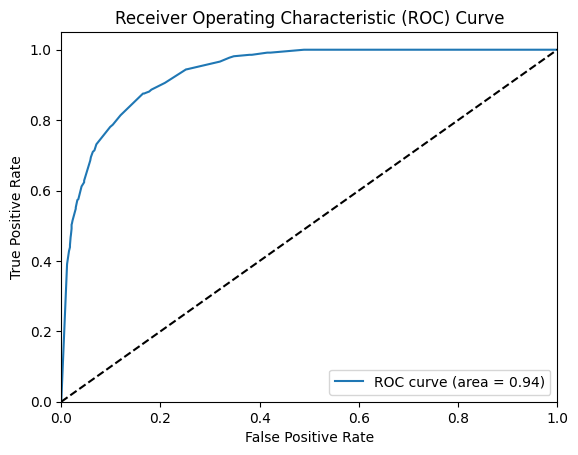

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9355885297849613
Accuracy for each fold: [0.82, 0.7966666666666666, 0.8366666666666667, 0.8166666666666667, 0.84, 0.7633333333333333, 0.8193979933110368, 0.7993311036789298, 0.7892976588628763, 0.8327759197324415]
Mean accuracy: 0.8114136008918618
95% confidence interval: (0.7941515555091175, 0.828675646274606)


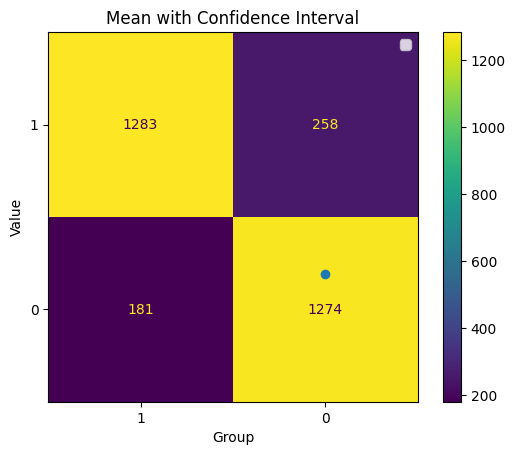

In [26]:
decision_tree = ML_algorithms.model_dt(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector MAchine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.78      0.72      1541
           1       0.71      0.57      0.63      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.68      0.67      2996
weighted avg       0.69      0.68      0.68      2996



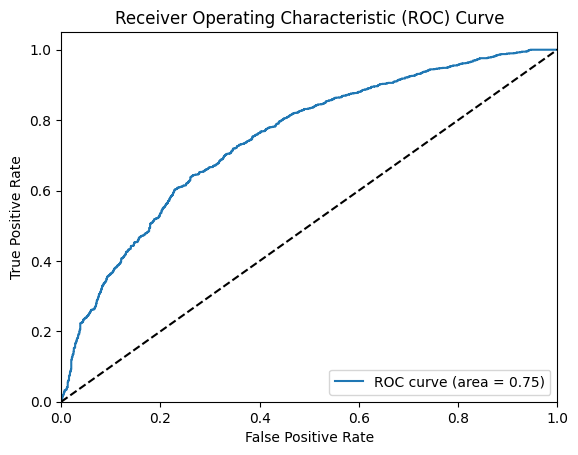

AUC Score: 0.7471450457260984


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6666666666666666, 0.6833333333333333, 0.61, 0.68, 0.76, 0.6766666666666666, 0.6722408026755853, 0.6187290969899666, 0.6722408026755853, 0.6521739130434783]
Mean accuracy: 0.6692051282051282
95% confidence interval: (0.6400168400635524, 0.698393416346704)


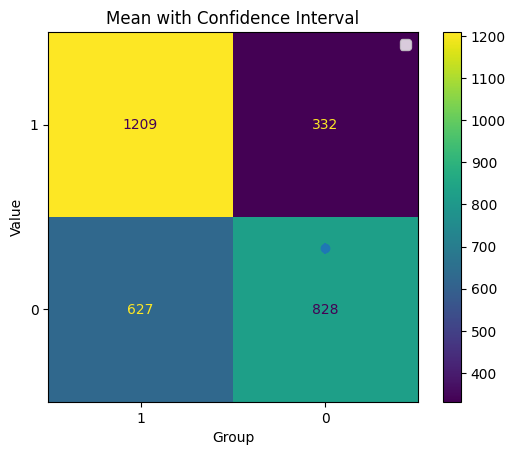

In [27]:
svm = ML_algorithms.model_svm(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_bmi, 'bmi')

Outliers found:


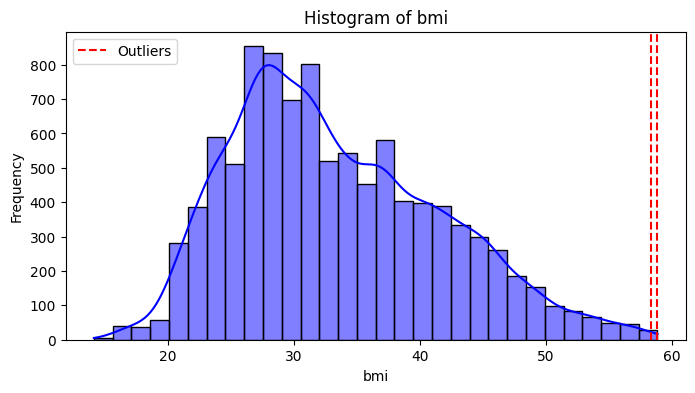

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1541
           1       0.83      0.88      0.85      1455

    accuracy                           0.85      2996
   macro avg       0.85      0.85      0.85      2996
weighted avg       0.85      0.85      0.85      2996

Node Labels:
 Annotation(0.600044, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6988\nvalue = [3500.0, 3488.0]\nclass = 0')


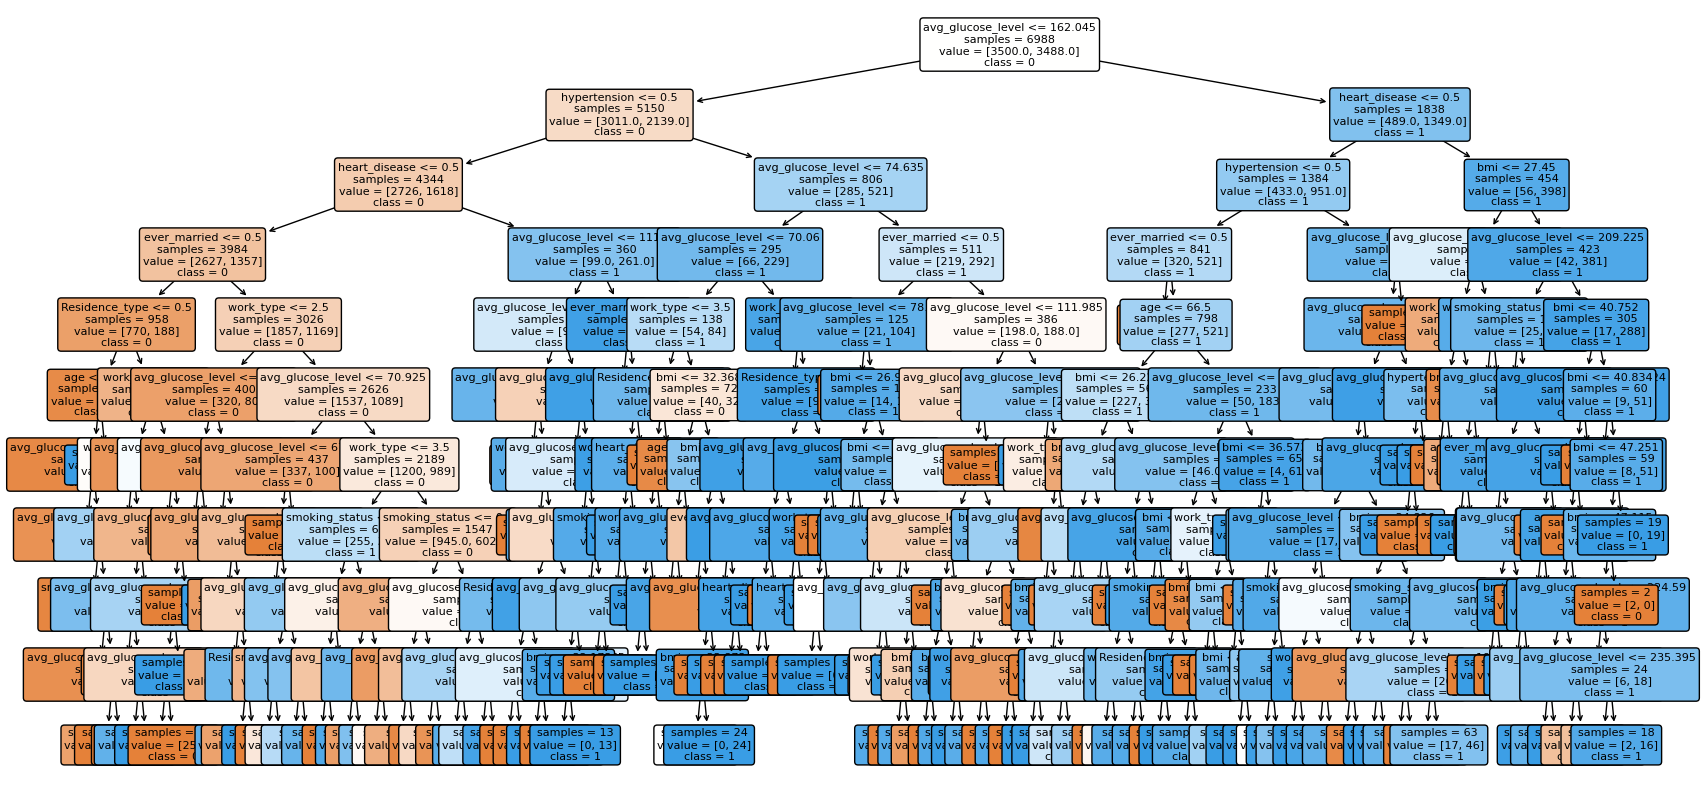

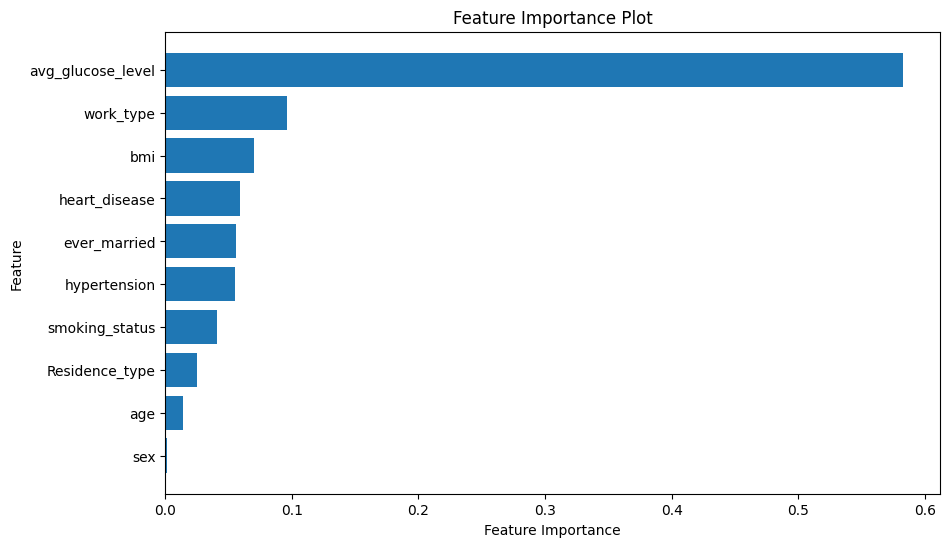

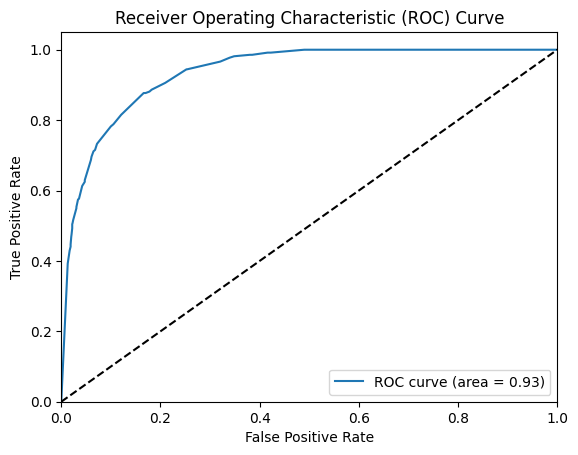

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9348486166210632
Accuracy for each fold: [0.8266666666666667, 0.8266666666666667, 0.7866666666666666, 0.8666666666666667, 0.7566666666666667, 0.8133333333333334, 0.8361204013377926, 0.7859531772575251, 0.8394648829431438, 0.7993311036789298]
Mean accuracy: 0.8137536231884057
95% confidence interval: (0.7907973412660795, 0.836709905110732)


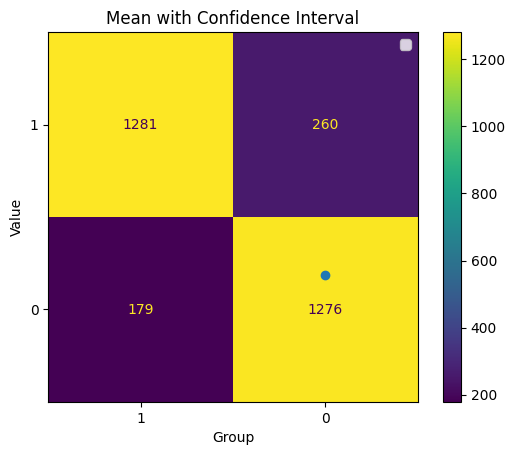

In [30]:
decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72      1541
           1       0.71      0.57      0.63      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.68      0.67      2996
weighted avg       0.69      0.68      0.68      2996



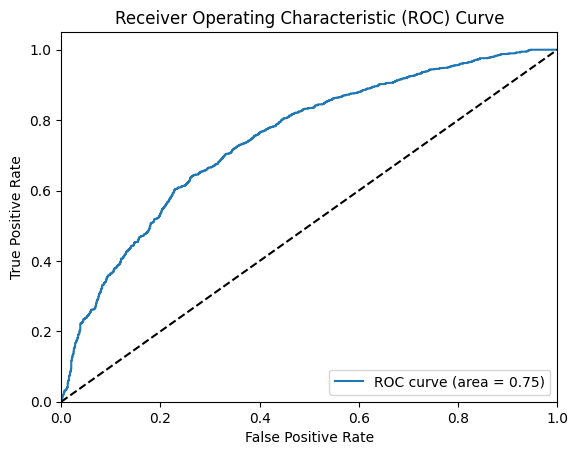

AUC Score: 0.7470870657916155


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6566666666666666, 0.68, 0.67, 0.6666666666666666, 0.6866666666666666, 0.6566666666666666, 0.6989966555183946, 0.6956521739130435, 0.6588628762541806, 0.6120401337792643]
Mean accuracy: 0.668221850613155
95% confidence interval: (0.6502269184997532, 0.6862167827265567)


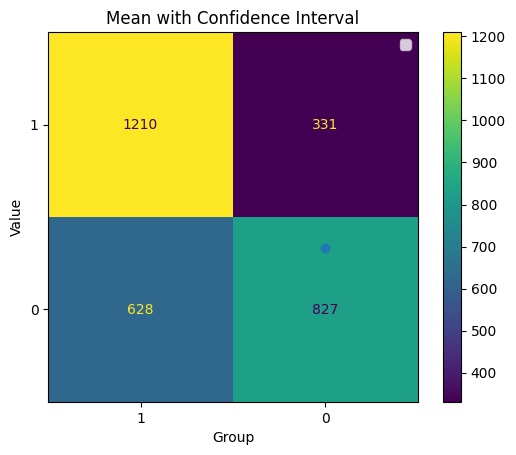

--------------------------------------


In [31]:
svm = ML_algorithms.model_svm(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

# Categorical

In [32]:
df = df_original.copy()

--------------------------------------
Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


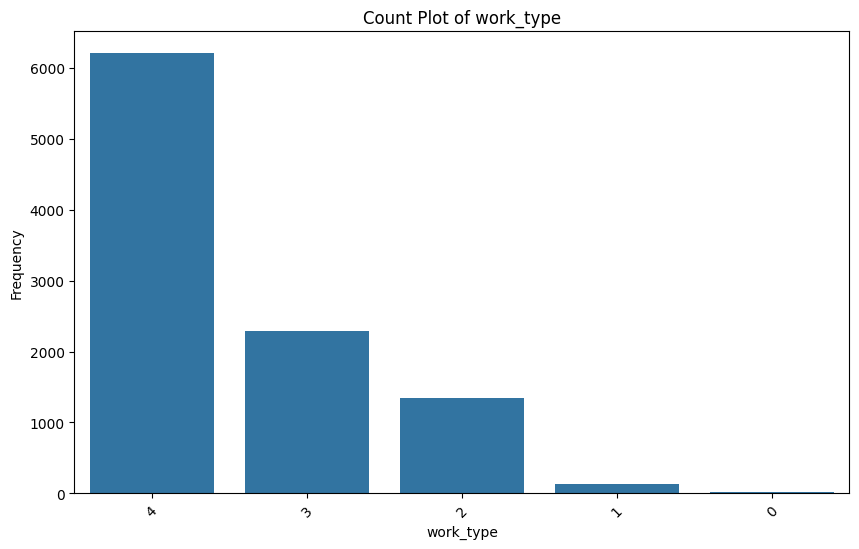

In [33]:
print('--------------------------------------')
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 30, df)

Valore meno frequente:  0


Value counts:
work_type
4    4364
0    3011
3    1589
2     935
1      85
Name: count, dtype: int64
Outliers detected: [4, 0, 3, 2, 1]
Outliers found:


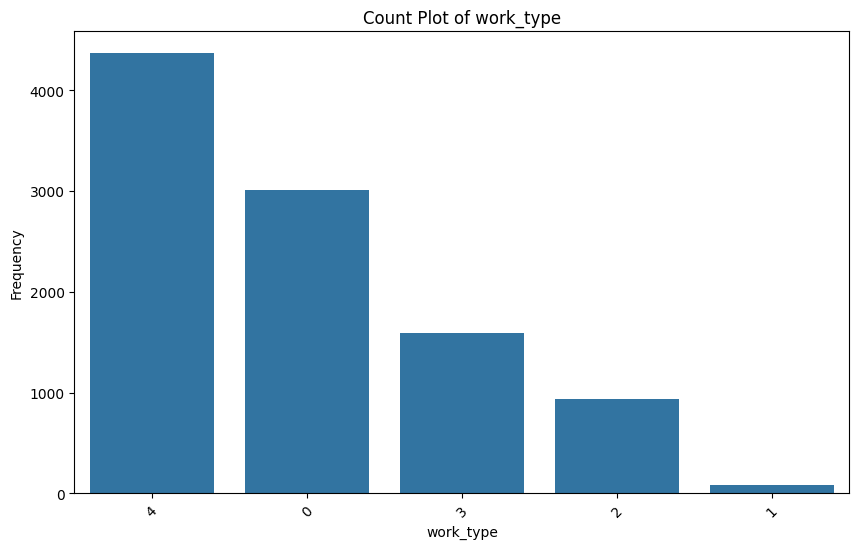

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1541
           1       0.80      0.88      0.84      1455

    accuracy                           0.83      2996
   macro avg       0.83      0.83      0.83      2996
weighted avg       0.84      0.83      0.83      2996

Node Labels:
 Annotation(0.626696, 0.954545, 'avg_glucose_level <= 170.64\nsamples = 6988\nvalue = [3458.0, 3530.0]\nclass = 1')


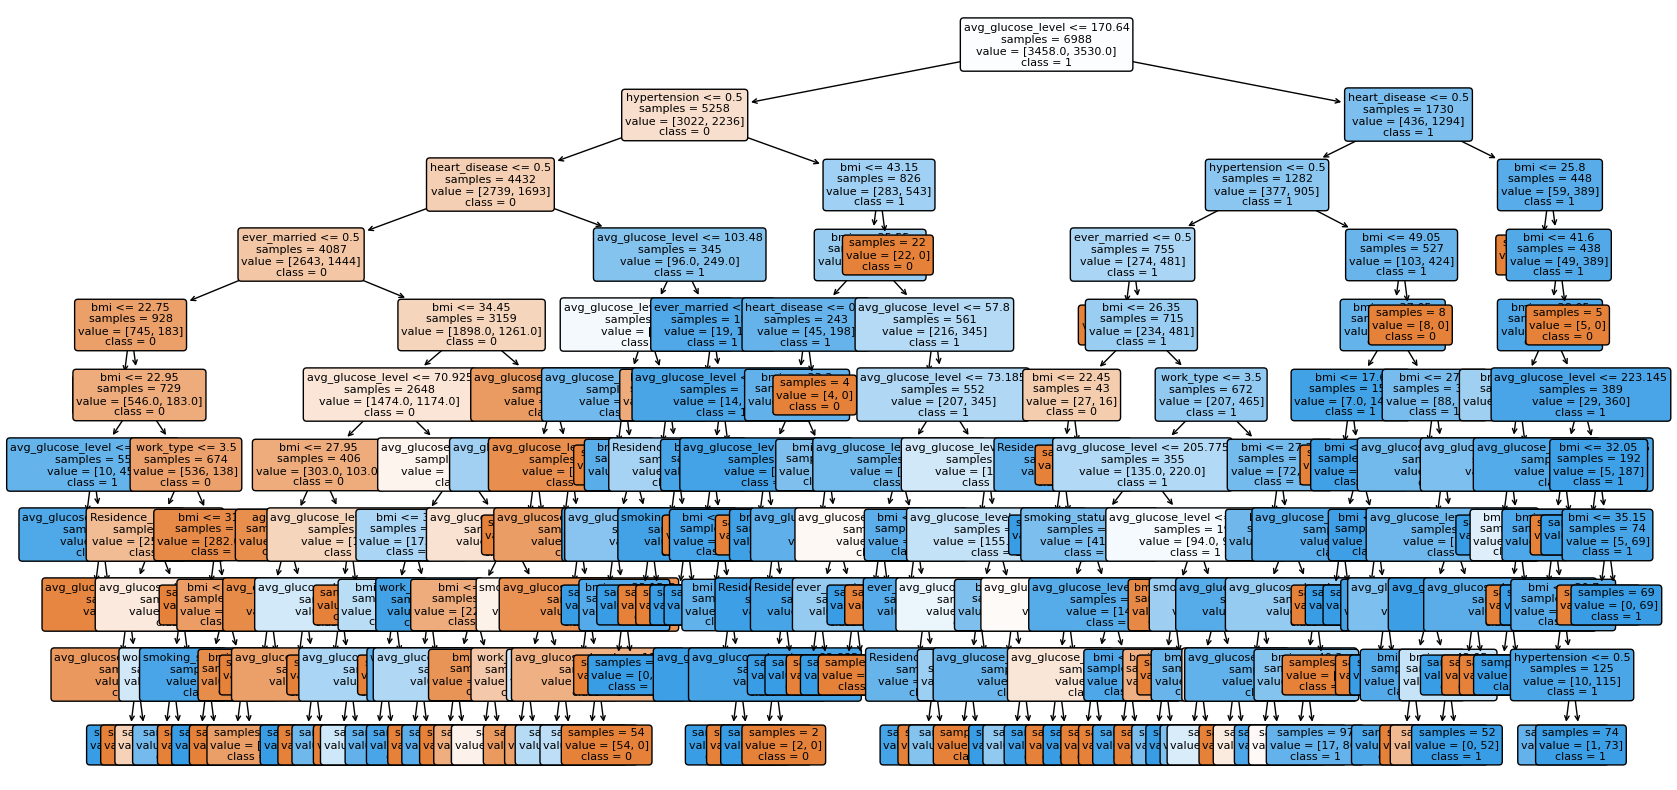

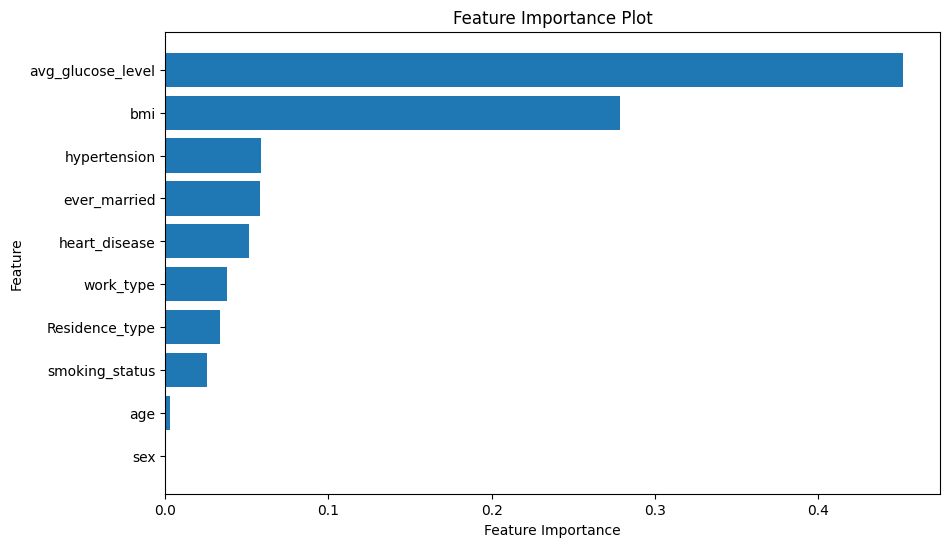

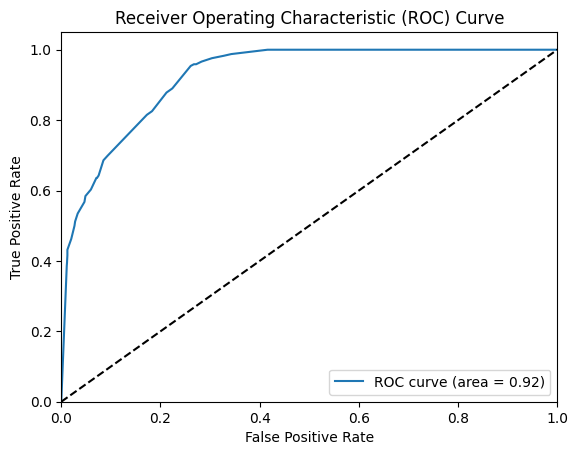

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9240777287921664
Accuracy for each fold: [0.8166666666666667, 0.7833333333333333, 0.8066666666666666, 0.82, 0.8633333333333333, 0.8133333333333334, 0.7892976588628763, 0.7993311036789298, 0.7959866220735786, 0.8060200668896321]
Mean accuracy: 0.8093968784838351
95% confidence interval: (0.7934486944222977, 0.8253450625453725)


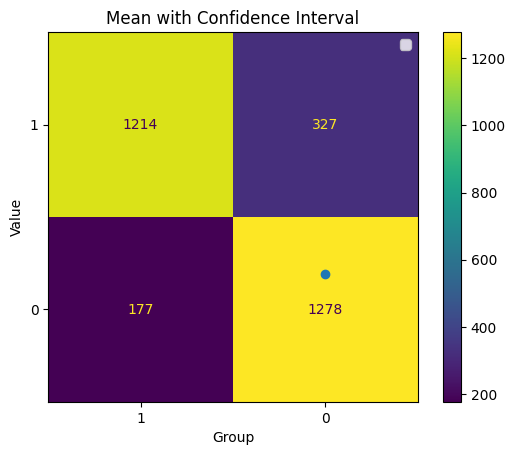

In [36]:
decision_tree = ML_algorithms.model_dt(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.79      0.72      1541
           1       0.72      0.56      0.63      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.67      0.67      2996
weighted avg       0.69      0.68      0.67      2996



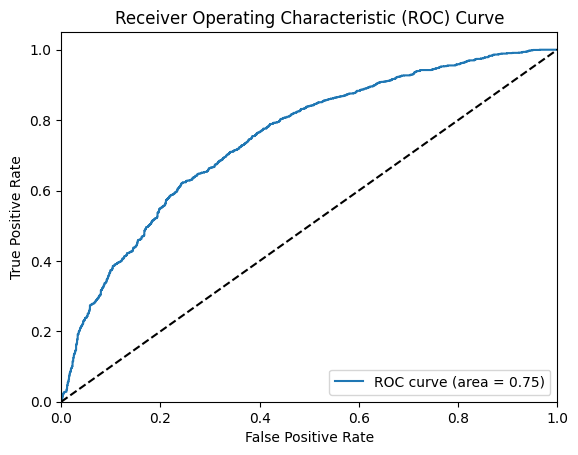

AUC Score: 0.7489473296895175


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6333333333333333, 0.6633333333333333, 0.68, 0.6766666666666666, 0.63, 0.6866666666666666, 0.7090301003344481, 0.6254180602006689, 0.6822742474916388, 0.6588628762541806]
Mean accuracy: 0.6645585284280936
95% confidence interval: (0.64475032318971, 0.6843667336664772)


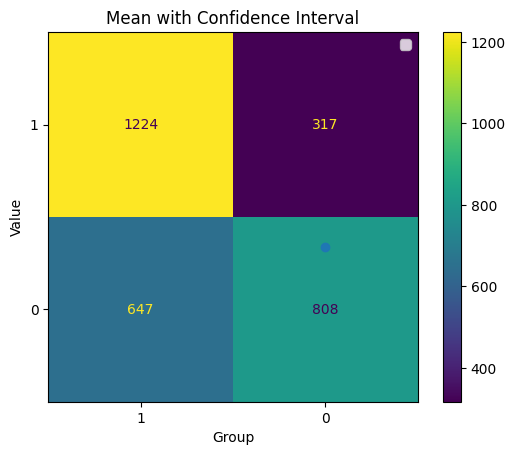

--------------------------------------


In [37]:
svm = ML_algorithms.model_svm(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm,df_original)

print('--------------------------------------')